# **Project 3 - Data Cleaning and EDA**

!! **Note** - The dataset was generated in a controlled environment, with each image carefully captured by placing the object on a white poster board under natural sunlight or room lighting. All images were resized to 512 x 384 pixels. So, while we check for data quality and prepare for cleaning, no further cleaning was necessary, allowing us to proceed directly with analysis on the original dataset. So, there is no need to download any additional datasets after completing this notebook. !!

To begin, open the dataset (`TrashNet`) from [HuggingFace](https://huggingface.co/datasets/garythung/trashnet) created by Mindy Yang and Gary Thung. Then, follow the instructions outlined in this notebook to guide you through the process of cleaning the data and preparing it for analysis.

This notebook focuses on the data cleaning and initial exploratory data analysis of .JPG images sorted into six classes: glass, paper, cardboard, plastic, metal, and trash. Instead of downloading the data directly onto the comupter, the data was pulled from the HuggingFace API, which was imported into Python for our analysis.

The main sections of this notebook include:

1. *Data Import and Cleaning*: This section outlines the steps for loading the dataset and checking for any necessary cleaning tasks that need to be done to prepare for analysis.

2. *Data Visualizations*: This section presents various visualizations to explore the categories and color hues within the dataset.

## Section 1 - Data Cleaning

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
from PIL import ImageStat

In [ ]:
# upload dataset from huggingface API
dataset = load_dataset("garythung/trashnet", split="train")

In [ ]:
# update labels from category numbers to names
label_mapping = {
    0: "cardboard",
    1: "glass",
    2: "metal",
    3: "paper",
    4: "plastic",
    5: "trash"
}

dataset = dataset.map(lambda x: {"label_name": label_mapping[x["label"]]})

print(dataset[0])

{'image': <PIL.Image.Image image mode=RGB size=3024x4032 at 0x7EACD11A5FF0>, 'label': 0, 'label_name': 'cardboard'}


In [ ]:
# check dataset size
print("Dataset Info:")
print(dataset)

Dataset Info:
Dataset({
    features: ['image', 'label', 'label_name'],
    num_rows: 5054
})


We found that the number of rows doubled in this dataset (there are only 2527 images, but 5054 rows). This happened because the dataset creators included an additional "train" data split, thus doubling the row count by duplicating each image entry. We chose not to remove the duplicates because having both the original and train split entries could be valuable for assessing model performance across varied data subsets. Keeping the duplicates allows us to simulate real-world scenarios where similar data points might appear multiple times, giving us insight into the model’s ability to generalize and avoid overfitting.

## Section 2 - EDA

Label Distribution (after halving counts):
cardboard: 403
glass: 501
metal: 410
paper: 594
plastic: 482
trash: 137


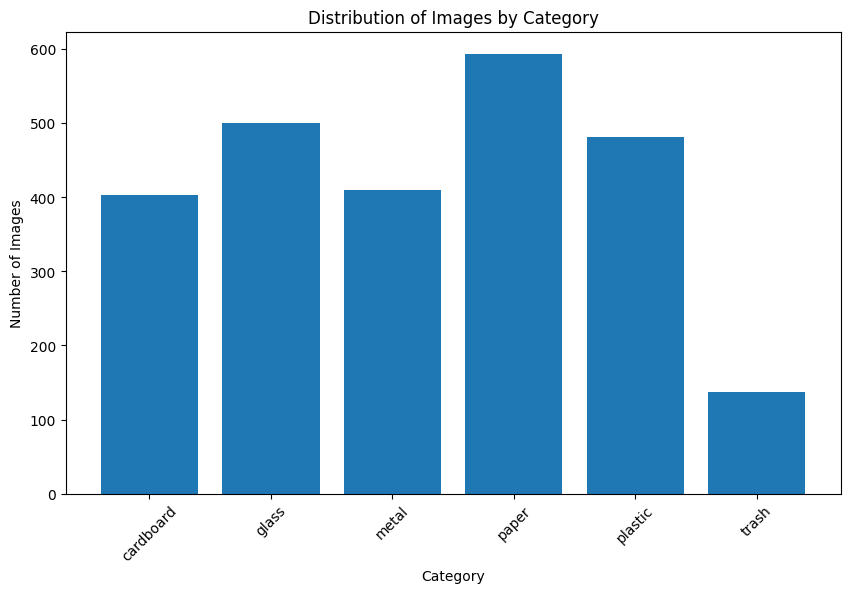

In [ ]:
# plot bargraph of category distributions
label_counts = Counter(dataset['label_name'])

# must halve each count to account for duplication from train data
label_counts = {label: count // 2 for label, count in label_counts.items()}

print("Label Distribution (after halving counts):")
for label, count in label_counts.items():
    print(f"{label}: {count}")

plt.figure(figsize=(10, 6))
plt.bar(label_counts.keys(), label_counts.values())
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Distribution of Images by Category')
plt.xticks(rotation=45)
plt.show()

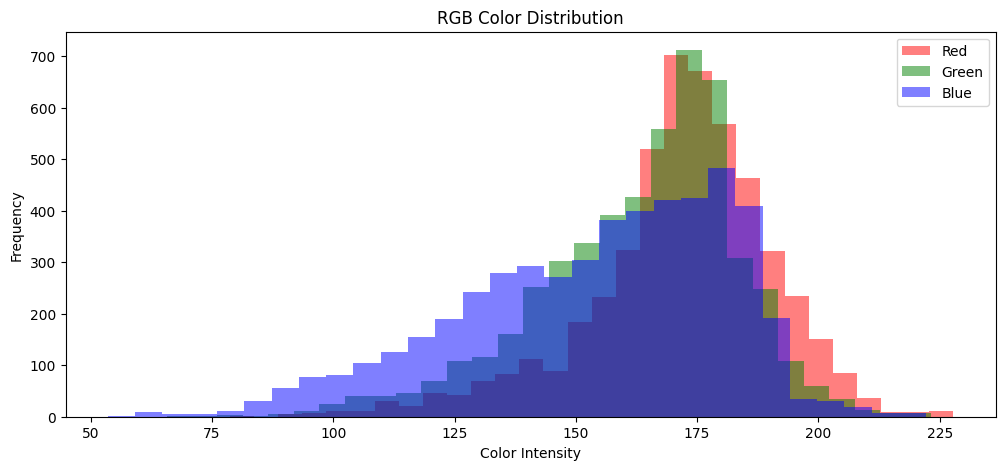

In [ ]:
# plot the distribution of red, green, blue colors in the images

red_vals, green_vals, blue_vals = [], [], []

for item in dataset:
    stat = ImageStat.Stat(item['image'])
    red_vals.append(stat.mean[0])
    green_vals.append(stat.mean[1])
    blue_vals.append(stat.mean[2])

plt.figure(figsize=(12, 5))
plt.hist(red_vals, bins=30, alpha=0.5, label='Red', color='red')
plt.hist(green_vals, bins=30, alpha=0.5, label='Green', color='green')
plt.hist(blue_vals, bins=30, alpha=0.5, label='Blue', color='blue')
plt.xlabel('Color Intensity')
plt.ylabel('Frequency')
plt.title('RGB Color Distribution')
plt.legend()
plt.show()